<a href="https://colab.research.google.com/github/Saeed-Akbari/CS5783-MachineLearning/blob/main/Assignment1/problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the path to where you have saved the input files.
pathXtrain="/content/drive/MyDrive/x_train.npy"
pathYtrain="/content/drive/MyDrive/y_train.npy"
pathXtest="/content/drive/MyDrive/x_test.npy"
pathYtest="/content/drive/MyDrive/y_test.npy"

xtrain = np.load(pathXtrain)
ytrain = np.load(pathYtrain)
xtest = np.load(pathXtest)
ytest = np.load(pathYtest)


In [ ]:
# Define the locally weighted linear regression model as a class
class locallyWeightedLR():
    # constructor function for initializing hyperparameter tau (bandwidth) and index of plt.figure(ind)
    def __init__(self, tau):
        self.tau = tau
        self.ind = 1

    def fit(self, x0, X, Y):

        tau = self.tau
        x0 = np.array([1, x0])
        X = np.vstack((np.ones(len(X)), X.reshape(len(X)))).T

        # weight corresponding to each point
        W = self.weightsCal(x0, X, tau)

        # parameters theta for each point
        theta = np.linalg.pinv(X.T * W @ X) @ X.T * W @ Y

        return x0 @ theta

    def weightsCal(self, x0, X, tau):
        return np.exp(-0.5 * np.sum((X - x0) ** 2, axis=1) / (tau **2))

    def plotResults(self, X, Y, path):

        s = np.linspace(np.min(X), np.max(X), num=50)
        yhat = [self.fit(x0, X, Y) for x0 in s]

        plt.figure(self.ind)
        self.ind += 1
        plt.plot(X, Y, 'o', color = 'blue', label="data")
        plt.plot(s, yhat, '*', color = 'orange', label="prediction")
        plt.xlabel('Features')
        plt.ylabel('Labels')
        plt.legend(loc="upper left")
        plt.savefig(path)

In [ ]:
# make an object of the locally weighted linear regression model
model = locallyWeightedLR(tau=0.1)

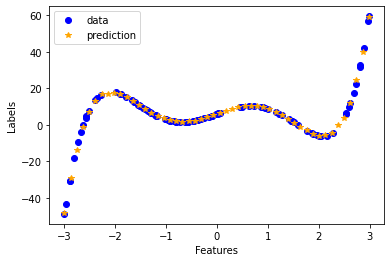

In [ ]:
# Change the path to where you want to save the result.
path = 'localTraining.png'
model.plotResults(xtrain, ytrain, path)

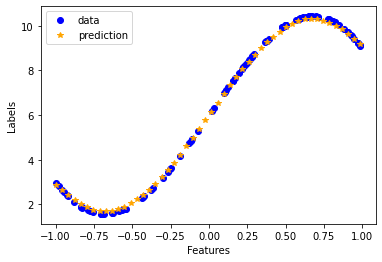

In [ ]:
# Change the path to where you want to save the result.
path = 'localTest.png'
model.plotResults(xtest, ytest, path)